In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('games.csv', low_memory=False)
df = df[df['White Rating'] != '?']
df = df[df['Black Rating'] != '?']
df = df.astype({
    'White Rating': int,
    'Black Rating': int,
})
df.head()

,Unnamed: 0,Event,Result,White Rating,Black Rating,Eco,Opening,Termination
0,0,Rated Blitz game,0-1,1346,1550,D00,Queen's Pawn Game,Time forfeit
1,1,Rated Classical game,1-0,1591,1377,C41,Philidor Defense #2,Normal
2,2,Rated Blitz game,1-0,1501,1447,C00,French Defense: La Bourdonnais Variation,Normal
3,3,Rated Blitz tournament,1-0,1674,1315,C50,Italian Game,Normal
4,4,Rated Bullet game,1-0,1945,1557,A00,Hungarian Opening,Time forfeit


In [15]:
print("There are " + str(len(df)) + " games (rows).")
print("Number of features are " + str(len(df.columns)) + " (columns).")

There are 523867 games (rows).
Number of features are 8 (columns).


In [16]:
# create a list of our conditions
df['Avg Rating'] = (df['White Rating'] + df['Black Rating']) / 2
df["Avg Rating"] = pd.to_numeric(df["Avg Rating"])
df["White Wins?"] = np.where(df['Result'] == '1-0', 'yes', 'no')
classes = [
    (df['Avg Rating'] <= 1200),
    (df['Avg Rating'] >= 1201) & (df['Avg Rating'] <= 1400),
    (df['Avg Rating'] >= 1401) & (df['Avg Rating'] <= 1600),
    (df['Avg Rating'] >= 1601) & (df['Avg Rating'] <= 1800),
    (df['Avg Rating'] >= 1801) & (df['Avg Rating'] <= 2000),
    (df['Avg Rating'] >= 2001) & (df['Avg Rating'] <= 2200),
    (df['Avg Rating'] >= 2201) & (df['Avg Rating'] <= 2300),
    (df['Avg Rating'] >= 2301) & (df['Avg Rating'] <= 2400),
    (df['Avg Rating'] >= 2401) & (df['Avg Rating'] <= 2500),
    (df['Avg Rating'] >= 2501) & (df['Avg Rating'] <= 2700),
    (df['Avg Rating'] >= 2701)
    ]

# create a list of the values we want to assign for each condition
values = ['Novices', 'Class D', 'Class C', 'Class B', 'Class A', 'Experts' ,'Candidate Masters', 'Fide Masters', 'International Masters', 'Grand Masters','Super Grandmasters']
df['strengthLevel'] = np.select(classes, values)
df = df[df['strengthLevel'] != '0']
df.head(25)



,Unnamed: 0,Event,Result,White Rating,Black Rating,Eco,Opening,Termination,Avg Rating,White Wins?,strengthLevel
0,0,Rated Blitz game,0-1,1346,1550,D00,Queen's Pawn Game,Time forfeit,1448.0,no,Class C
1,1,Rated Classical game,1-0,1591,1377,C41,Philidor Defense #2,Normal,1484.0,yes,Class C
2,2,Rated Blitz game,1-0,1501,1447,C00,French Defense: La Bourdonnais Variation,Normal,1474.0,yes,Class C
3,3,Rated Blitz tournament,1-0,1674,1315,C50,Italian Game,Normal,1494.5,yes,Class C
4,4,Rated Bullet game,1-0,1945,1557,A00,Hungarian Opening,Time forfeit,1751.0,yes,Class B
5,5,Rated Bullet game,0-1,1732,1958,B90,"Sicilian Defense: Najdorf Variation, English A...",Time forfeit,1845.0,no,Class A
6,6,Rated Classical game,0-1,1548,1752,C24,Bishop's Opening: Berlin Defense,Normal,1650.0,no,Class B
7,7,Rated Bullet tournament,0-1,1987,1933,C27,Vienna Game,Normal,1960.0,no,Class A
8,8,Rated Bullet game,1-0,1616,1593,A00,Mieses Opening,Normal,1604.5,yes,Class B
9,9,Rated Bullet game,0-1,1213,1330,A04,Zukertort Opening: Quiet System,Time forfeit,1271.5,no,Class D


In [23]:
df['strengthLevel'].value_counts()
#There seems to be relative odd distribution as more players tend to aggregate around Classes B and C [ELO rating of 1400-1800]. There are very few masters (2000+) on this website.

Class B                  173994
Class C                  164698
Class A                   87558
Class D                   64079
Experts                   20664
Novices                    8691
Candidate Masters          1897
Fide Masters                819
International Masters        87
Grand Masters                27
Name: strengthLevel, dtype: int64

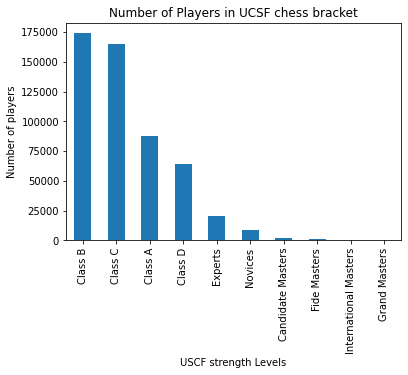

In [28]:
df['strengthLevel'].value_counts().plot(kind='bar')
plt.title('Number of Players in UCSF chess bracket')
plt.xlabel('USCF strength Levels')
plt.ylabel('Number of players')
plt.show()
#There seems to be a lot of 1400-1800 elo rated chess players on this website, but at the 90% cut off score of 1850, there seems to be 
#quite a heavy handful of players who are in the 1800-2000 chess bracket. Above 2100 rated players are extremely rare because it takes about 10
#years on average for someone to be a chess expert. This is a reasonable assumption as to why there are very few FIDE masters (2300+), International Masters (2400+), and Grandmasters (2500+).

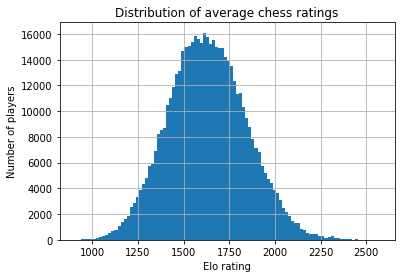

In [29]:
df['Avg Rating'].hist(bins=100)
plt.title('Distribution of average chess ratings')
plt.xlabel('Elo rating')
plt.ylabel('Number of players')
plt.show()
# The average chess rating tend to cluster at around 1500-1750 which is slightly higher than the average chess rating of around 1200. 
#This shows that more students who have had experience playing the game are more common to play on this website to seek players closer to their real rating.
#Chess experts and masters (players above 2100+ ) aren't seen as much due to the amount of time and dedication it takes to reach the master title as well as there only being about 1000 grandmasters.

In [30]:
print("The average chess rating of someone on the site is: " + str(np.mean(df['Avg Rating'])) + ".")

The average chess rating of someone on the site is: 1631.02944801479.
